#Рубежный контроль №2

Студент группы ИУ5-21М Андреев Кирилл.

## Задание

Необходимо решить задачу классификации текстов на основе любого выбранного Вами датасета (кроме примера, который рассматривался в лекции). Классификация может быть бинарной или многоклассовой. Целевой признак из выбранного Вами датасета может иметь любой физический смысл, примером является задача анализа тональности текста.

## Решение

### Импорт библотек

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Загрузка датасета

Загрузка csv файла в colab

In [6]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving news.csv to news.csv
User uploaded file "news.csv" with length 53582940 bytes


Датасет - текст новостей. В качестве целевого признака используем тему новости.

In [7]:
text = pd.read_csv("news.csv")
text.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
text['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

2 уникальных значения - поличтические и мировые новости.

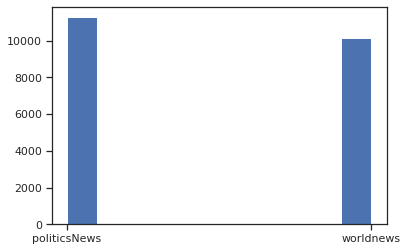

In [9]:
plt.hist(text['subject'])
plt.show()

Сформируем общий словарь для обучения моделей из обучающей и тестовой выборки

In [0]:
vocab_list = text['text'].tolist()

In [13]:
vocabVect = CountVectorizer()
vocabVect.fit(vocab_list)
corpusVocab = vocabVect.vocabulary_
print('Количество сформированных признаков - {}'.format(len(corpusVocab)))

Количество сформированных признаков - 66663


In [14]:
tfidfv = TfidfVectorizer(ngram_range=(1,3))
tfidf_ngram_features = tfidfv.fit_transform(vocab_list)
tfidf_ngram_features

<21417x5874263 sparse matrix of type '<class 'numpy.float64'>'
	with 19422598 stored elements in Compressed Sparse Row format>

### Сравнение классификаторов

In [0]:
X_train, X_test, y_train, y_test = train_test_split(text['text'], text['subject'], test_size=0.5, random_state=1)

Используем метрики качества balanced_accuracy и матрицу ошибок.

In [0]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        temp_data_flt = df[df['t']==c]
        temp_acc = balanced_accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))
    


In [0]:
def sentiment(v, c):
    model = Pipeline(
        [("vectorizer", v), 
         ("classifier", c)])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    print_accuracy_score_for_classes(y_test, y_pred)
    
    # Матрица ошибок
    fig, ax = plt.subplots( figsize=(15,5))
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, ax=ax)


Логистическая ререссия

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


Метка 	 Accuracy
politicsNews 	 0.940130304631097
worldnews 	 0.9393638170974155


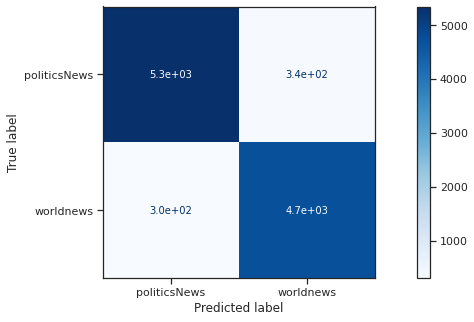

In [18]:
sentiment(TfidfVectorizer(ngram_range=(1,3)), LogisticRegression())

К ближайших соседей

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


Метка 	 Accuracy
politicsNews 	 0.9543933791160416
worldnews 	 0.8602385685884691


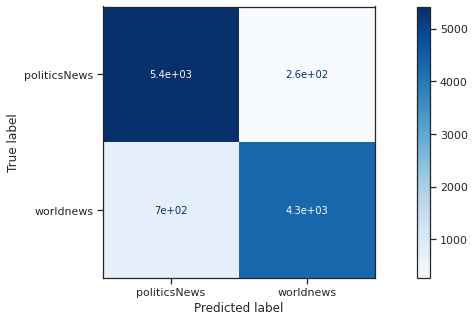

In [22]:
sentiment(TfidfVectorizer(ngram_range=(1,4)), KNeighborsClassifier(n_neighbors=5))

Multinomial Naive Bayes

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


Метка 	 Accuracy
politicsNews 	 0.9346715971121676
worldnews 	 0.906361829025845


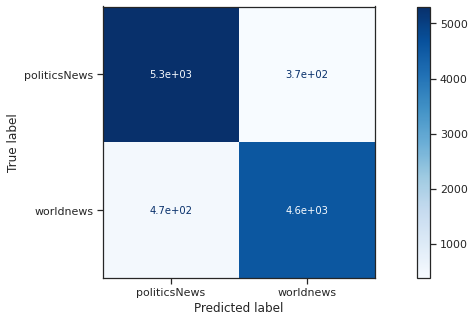

In [23]:
sentiment(TfidfVectorizer(), MultinomialNB())

Complement Naive Bayes

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


Метка 	 Accuracy
politicsNews 	 0.9304455009684803
worldnews 	 0.9133200795228629


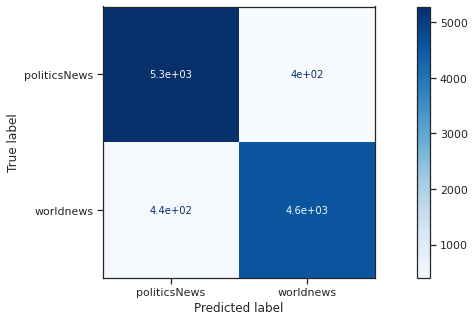

In [24]:
sentiment(TfidfVectorizer(), ComplementNB())

## Вывод

Наиболее качественную классификацию осуществил классификатор LogisticRegression (~94%). Из Байесовских классификаторов наиболее качественную классификацию осуществил CNB.